# Project: Do women who spend more years in school have less children? 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report will explore trends in fertility and education of women globally, as well as in India specifically (a country in rapid change).  
> 
> I have selected two data sets from Gapminder for this analysis: 
>
>**The first dataset**, "children_per_woman_total_fertility.csv", contains the total fertility rate - the number of children born per woman over time. 
>
>**The second dataset**, "mean_years_in_school_women_of_reproductive_age_15_to_44", contains the mean years in school for women of the reproductive ages 15- 44 over time. 
>
>**Research Questions:** 
>
>1) How has the number of children born per woman changed globally, and specifically in India? 
>
>2) How has the mean years in school of women between the ages 15 - 44 changed globally, and specifically in India?
>
>3) Could there be a relationship between children born per woman and number of years in school (bearing in mind correlation does not mean causation)?


In [469]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### Let's load the datasets!
>
>To make the data easiert to read, we will set the first column with the countries to be the index when we load it. 

In [428]:
fertility = pd.read_csv("children_per_woman_total_fertility.csv", index_col=0)
female_education_years = pd.read_csv("mean_years_in_school_women_of_reproductive_age_15_to_44.csv", index_col=0)

### Data Cleaning 

> FIRST DATA SET: fertility

To see what we are working with let's look at the first five data rows of the dataset "fertility" containing the total fertility rate: the average number of children born per woman in each country of the world, from 1800 to 2018.


In [429]:
fertility.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


To get a better idea of the size of the dataset, let's also take a look at it's shape. 

In [351]:
fertility.shape

(184, 219)

Now let's check and clean the dataset. We'll check for non-values, duplicates and the right data type (should be float), and if necessary clean them. 

To check for NA missing values: 

In [352]:
sum(fertility.isna().sum())

0

To check for duplicate values: 

In [353]:
sum(fertility.duplicated())

0

To check the data type (should be float): 

In [354]:
fertility.dtypes

1800    float64
1801    float64
1802    float64
1803    float64
1804    float64
1805    float64
1806    float64
1807    float64
1808    float64
1809    float64
1810    float64
1811    float64
1812    float64
1813    float64
1814    float64
1815    float64
1816    float64
1817    float64
1818    float64
1819    float64
1820    float64
1821    float64
1822    float64
1823    float64
1824    float64
1825    float64
1826    float64
1827    float64
1828    float64
1829    float64
         ...   
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
Length: 219, dtype: obje

> SECOND DATA SET: female_education_years

To see what we are working with let's look at the first five data rows of the dataset "female_education_years" containing the mean years in school for women of the reproductive ages 15- 44, from 1970 to 2009.

In [430]:
female_education_years.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,...,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8
Albania,5.6,5.7,5.9,6.0,6.2,6.3,6.5,6.6,6.8,7.0,...,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7
Algeria,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,...,5.8,5.9,6.1,6.2,6.4,6.5,6.7,6.8,6.9,7.1
Angola,0.9,1.0,1.0,1.1,1.1,1.2,1.2,1.3,1.4,1.4,...,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5
Antigua and Barbuda,8.1,8.3,8.5,8.7,8.8,9.0,9.2,9.4,9.6,9.7,...,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.3,13.4,13.5


To get a better idea of the size of the dataset, let's also take a look at it's shape. 

In [356]:
female_education_years.shape

(174, 40)

Now let's check and clean the dataset. Again we'll check for non-values, duplicates and the right data type (should be a float), and if necessary clean them. 

To check for NA non-values:

In [357]:
sum(female_education_years.isna().sum())

0

To check for duplicate values:

In [358]:
sum(female_education_years.duplicated())

0

To check the data type (should be float): 

In [359]:
female_education_years.dtypes

1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
dtype: object

Now that we are sure both datasets are clean, let's trim them to look only at India. 

We will also trim to the years where they overlap: 1970 - 2009. 


In [360]:
fertility_in = fertility.loc[['India'], "1970":"2009"]
fertility_in
                                 

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
India,5.59,5.52,5.44,5.36,5.28,5.19,5.11,5.03,4.96,4.89,...,3.31,3.24,3.18,3.11,3.04,2.97,2.9,2.82,2.75,2.67


In [361]:
female_education_in = female_education_years.loc[['India'], "1970":"2009"]
female_education_in

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
India,1.1,1.2,1.2,1.3,1.4,1.5,1.6,1.6,1.7,1.8,...,4.3,4.4,4.6,4.7,4.9,5.0,5.2,5.3,5.5,5.7


Now we will combine both data sets. To do this we must first rename both indexes called "India" to be called "India_Fertility" and "India_Education" so we can keep them apart once merged. Then we will transpose them (so they are long and not wide) and then we will merge them. The new merged dataset will be called "fertility_education". 

In [362]:
fertility_in.rename(index = {"India": "India_Fertility"}, 
                                 inplace = True)
fertility_in

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
India_Fertility,5.59,5.52,5.44,5.36,5.28,5.19,5.11,5.03,4.96,4.89,...,3.31,3.24,3.18,3.11,3.04,2.97,2.9,2.82,2.75,2.67


In [363]:
fertility_in = fertility_in.transpose()
fertility_in

country,India_Fertility
1970,5.59
1971,5.52
1972,5.44
1973,5.36
1974,5.28
1975,5.19
1976,5.11
1977,5.03
1978,4.96
1979,4.89


In [364]:
female_education_in.rename(index = {"India": "India_Education"}, 
                                 inplace = True)
female_education_in

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
India_Education,1.1,1.2,1.2,1.3,1.4,1.5,1.6,1.6,1.7,1.8,...,4.3,4.4,4.6,4.7,4.9,5.0,5.2,5.3,5.5,5.7


In [365]:
female_education_in = female_education_in.transpose()
female_education_in

country,India_Education
1970,1.1
1971,1.2
1972,1.2
1973,1.3
1974,1.4
1975,1.5
1976,1.6
1977,1.6
1978,1.7
1979,1.8


In [431]:
fertility_education = fertility_in.join(female_education_in, how='outer')

In [378]:
fertility_education

country,India_Fertility,India_Education
1970,5.59,1.1
1971,5.52,1.2
1972,5.44,1.2
1973,5.36,1.3
1974,5.28,1.4
1975,5.19,1.5
1976,5.11,1.6
1977,5.03,1.6
1978,4.96,1.7
1979,4.89,1.8


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: How has the number of children born to one woman changed globally, and specifically in India? 


To explore this, let's plot the mean of babies born across all countries in the world, over the years. Looking at the graph, we can see that globally for a long time it was normal to have around 5-6 babies per woman. Then in the 1970s a rapid decrease in babies per woman globally occurred, down to 1-2 babies per woman in 2018. 

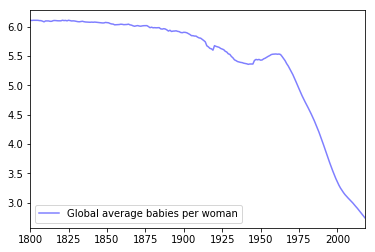

In [478]:
fertility.mean().plot(color = "blue", alpha = 0.5, label='Global average babies per woman')
plt.legend();

Let's also take a look at how the amount of babies born per women was distributed among the countries of the world in the latest year available to us (2009), as well as 100 years before that (1909). In our histogram we can clearly see the change in the last 100 years of around 6-7 babies per woman being the norm in 1909 (in orange), to around 1-3 babies being the norm in 2009 (in blue).

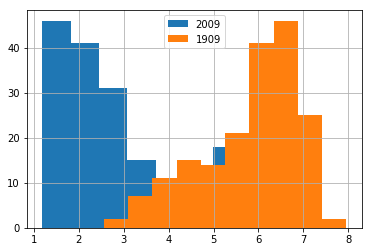

In [473]:
fertility["2009"].transpose().hist(label = '2009') 
fertility["1909"].transpose().hist(label = '1909')
plt.legend();

Finally let's plot India's fertility development over time. Here we can see that India has followed the world trend of steadily decreasing babies per woman. 

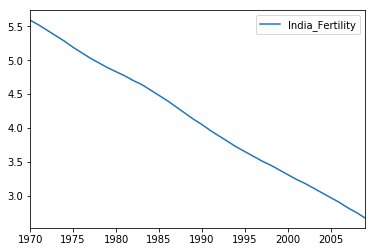

In [474]:
fertility_in.plot()
plt.legend(); 


As we can see, the number of babies per woman in India over the time of 1970 - 2009 has steadily decreased from around 5.5 babies per woman in 1970 to around 1-2 babies per woman in 2009. This mirrors the rapid global change that happened at this time. 

### Research Question 2: How has the mean years in school of women between the ages 15-44 changed globally, and specifically in India?   


To explore how many years women across the world spend in school, let's plot the mean across all countries in the world over the years 1970 - 2009. 

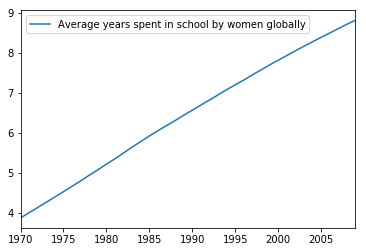

In [476]:
female_education_years.mean().plot(label = "Average years spent in school by women globally")
plt.legend();

Let's also take a look at how the amount of years in school was distributed in our latest data (2009), as well as in our earliest data (1970). In our histogram we can clearly see the change in the last 40 years of around 1-4 years in school being the norm for women in 1970 (in orange), to around 11-13 years in school being the norm for women in 2009 (in blue). However, these are quite widely distributed, so we must keep in mind there is a lot of variation across the world. 

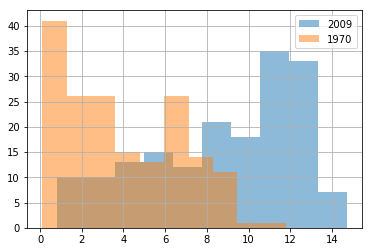

In [481]:
female_education_years["2009"].transpose().hist(alpha=0.5, label = "2009")
female_education_years["1970"].transpose().hist(alpha = 0.5, label = "1970")
plt.legend();

Finally let's plot India's development in female education years over time. Let's even place both the global mean data (in orange) and India's data (in blue) on the same graph so we can compare them better. 
Here we can see that India's development in this area has again followed the global trend, but is still quite a bit lower, although there is a slight upward curve to India's line. 

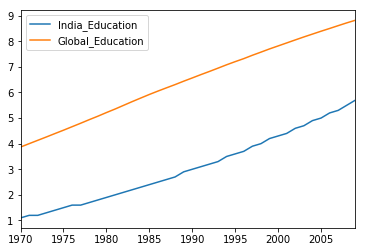

In [488]:
female_education_in.plot(label="India_Education")
female_education_years.mean().plot(label = "Global_Education")
plt.legend();

### Could there be a relationship between children born per woman and number of years in school in India (bearing in mind correlation does not mean causation)?

Let's plot both the fertility and education of women in India on the same graph to get an idea of the data. As we can see their trends go in opposite directions, with fertility going down and education going up.  

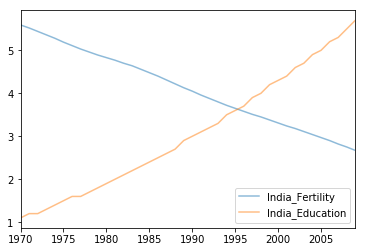

In [489]:
fertility_education.plot(alpha= 0.5)
plt.legend();

Next, let's plot fertility of Indian women against education of Indian women, to see if there is a correlation.   

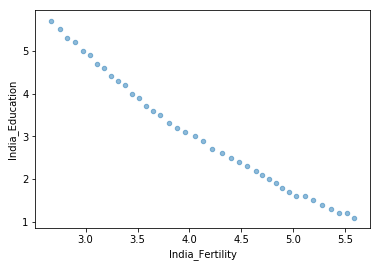

In [491]:
fertility_education.plot(x='India_Fertility', y='India_Education', kind='scatter', alpha = 0.5);

It looks like the number of babies born per woman, and the number of years women spent in school have an inverse relationship - but we must bear in mind that correlation does not mean causation. We don't know whether these two are definitely influencing each other, or if there are other factors at play here. However, this does indicate that a relationship could exist. 

<a id='conclusions'></a>
## Conclusions

> In conclusion, up until the 1970s the amount of babies born per woman globally had stayed around 5-6 children. Following the 1970s there has been a steady, rapid decline of babies born per woman globally, to 1-3 children in 2018. 
>
> India specifically has also had a steady decrease in babies born per woman, going from 5.5 babies born per woman in 1970 to 1-2 babies born in 2018.
>
> Moreover, the global average amount of years spent in school of women aged 15-44 has increased steadily. There was a clear change in the last 40 years of around 1-4 years in school being the global average for women in the 1970s, to around 11-13 years in school being the global average for women in 2009. However, as the amount of years is widely distributed, we must keep in mind there is a lot of variation across the world and investigate countries separately.
>
> India has also had an increase in the amount of years women of ages 15-44 spend in school. When comparing India's average against the global average we see that India was always around 3 years below the world  average (at 1 year in school around the 1970s, and at around 5 years in 2009), but the line is ever-so-slowly curving upwards.
>
>Thinking about fertility and education, it seems likely that these two might have a relationship. When plotted against each other, we can see that they seem to have an inverse relationship, where women who have spent more years in school have less children. Although correlation does not mean causation, it gives an indication to look at this correlation more closely. Maybe having less children gives women more time to be educated, or more education makes women focus more on their careers and having children becomes less of a priority or just happens later in life...there are many different factors that will play into this relationship, which could not be explored for this project, but which should be further explored at some point.  
